# Optimalizace v Pythonu
## lokální optimalizace

skalární funkce $x^4-(x-1)^2$


In [9]:
def objective_function(x):
    return x ** 4 - (x-1) ** 2

In [10]:
from scipy.optimize import minimize
x0 = 6
opt = minimize(objective_function, x0)
print("minimum",opt.fun,"found at",opt.x)

minimum -2.999999999999999 found at [-0.99999999]


- zkuste různé počáteční hodnoty, vypište počet vyčíslení cílové funkce

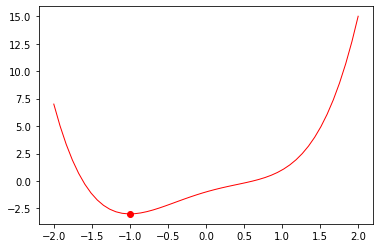

In [11]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-2,2,50)
y = objective_function(x)
plt.plot(x,y,c="r",lw=1)
plt.plot(opt.x,opt.fun,"ro")
plt.show()


- změňte funkci na $x^4-x^2$, co se změní?
- hledejme řešení pouze na určitém intervalu, například pouze pro nezáporná čísla

minimum -1.0 found at [0.]


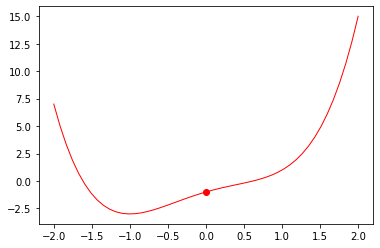

In [12]:
import math
x0 = 6
opt = minimize(objective_function, x0, bounds=[(0.,math.inf)])
print("minimum",opt.fun,"found at",opt.x)
x = np.linspace(-2,2,50)
y = objective_function(x)
plt.plot(x,y,c="r",lw=1)
plt.plot(opt.x,opt.fun,"ro")
plt.show()


- funkce více proměnných: https://en.wikipedia.org/wiki/Test_functions_for_optimization

In [13]:
def beale(x):
    return (1.5-x[0]+x[0]*x[1])**2+(2.25-x[0]+x[0]*x[1]**2)**2 + (2.625-x[0]+x[0]*x[1]**3)**2
def himmelblau(x):
    return (x[0]**2+x[1]-11)**2+(x[0]+x[1]**2-7)**2 
def rosenbrock(x):
    return 100.0*(x[1]-x[0]**2)**2 + (1.-x[0])**2 

In [14]:
x0 = [1,1]
objective_function = beale
opt = minimize(objective_function, x0, bounds=[(-4,4),(-4,4)])
print("minimum",opt.fun,"found at",opt.x)

minimum 1.0040687225723415e-14 found at [2.99999992 0.49999996]


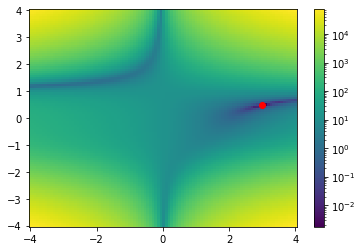

In [15]:
import matplotlib.colors as colors
x = np.linspace(-4,4,100)
grid = np.meshgrid(x,x)
Z = objective_function(grid)
plt.pcolor(grid[0],grid[1],Z,norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()))
plt.plot(opt.x[0],opt.x[1],"ro")
plt.colorbar()
plt.show()

- test various methods: https://docs.scipy.org/doc/scipy/tutorial/optimize.html

In [16]:
x0 = [1,2]
objective_function = himmelblau
opt = minimize(objective_function, x0, method = "Nelder-Mead", bounds=[(-4,4),(-4,4)])
print("minimum",opt.fun,"found at",opt.x, ", method Nelder-Mead with",opt.nfev, "calls")
opt = minimize(objective_function, x0, method = "Powell", bounds=[(-4,4),(-4,4)])
print("minimum",opt.fun,"found at",opt.x, ", method Powell with",opt.nfev, "calls")
opt = minimize(objective_function, x0, method = "CG")
print("minimum",opt.fun,"found at",opt.x, ", method CG with",opt.nfev, "calls")
opt = minimize(objective_function, x0, method = "BFGS")
print("minimum",opt.fun,"found at",opt.x, ", method BFGS with",opt.nfev, "calls")

minimum 2.2828515760731993e-08 found at [3.00000498 1.99996105] , method Nelder-Mead with 82 calls
minimum 1.263761073290587e-10 found at [2.99999805 2.00000046] , method Powell with 46 calls
minimum 2.841654471657735e-15 found at [2.99999999 1.99999999] , method CG with 57 calls
minimum 8.29688916827985e-13 found at [2.99999984 2.00000016] , method BFGS with 36 calls


- increasing precision

In [17]:
objective_function = himmelblau
opt = minimize(objective_function, x0, method = "Nelder-Mead", bounds=[(-4,4),(-4,4)], tol=1e-14)
print("minimum",opt.fun,"found at",opt.x, ", method Nelder-Mead with",opt.nfev, "calls")

minimum 3.060780312257526e-28 found at [3. 2.] , method Nelder-Mead with 226 calls


## globální optimalizace
- mnoho lokálních minim, my ale potřebujeme globální minimum

In [18]:
def eggholder(x):
    return (-(x[1] + 47) * np.sin(np.sqrt(abs(x[0]/2 + (x[1]  + 47))))-x[0] * np.sin(np.sqrt(abs(x[0] - (x[1]  + 47)))))
bounds = [(-512, 512), (-512, 512)]

In [19]:
x0 = [100,-200]
opt = minimize(eggholder, x0, bounds=bounds)
print("minimum",opt.fun,"found at",opt.x)

minimum -206.6974063883589 found at [  61.290469   -198.76831816]


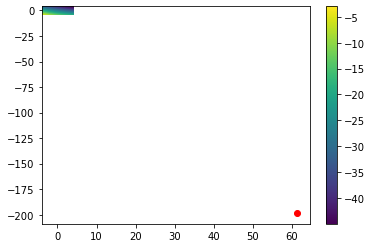

In [20]:
def plot_results():
    x = np.linspace(-512,512,100)
    gridgrid = np.meshgrid(x,x)
    Z = eggholder(grid)
    plt.pcolor(grid[0],grid[1],Z,norm=colors.Normalize(vmin=Z.min(), vmax=Z.max()))
    plt.plot(opt.x[0],opt.x[1],"ro")
    plt.colorbar()
    plt.show()
plot_results()

### shgo
- simplicial homology global optimization (orientovaná triangulace prostoru)
- kritická je volba samplovacího algoritmu

minimum -935.3379515604948 found at [439.48097554 453.97741501]


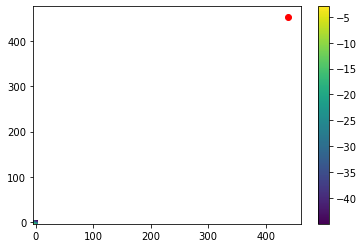

In [21]:
from scipy.optimize import shgo
opt = shgo(eggholder, bounds)
print("minimum",opt.fun,"found at",opt.x)
plot_results()

### dual annealing
- simulované žíhání

minimum -959.6406627207264 found at [512.         404.23179465]


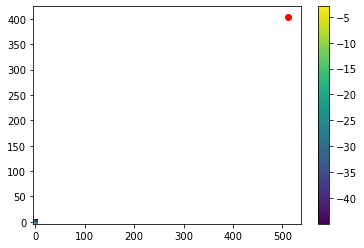

In [22]:
from scipy.optimize import dual_annealing
opt = dual_annealing(eggholder, bounds)
print("minimum",opt.fun,"found at",opt.x)
plot_results()

### differential evolution
- evoluční algoritmus

minimum -715.9801136096685 found at [ 494.0540196  -271.82194711]


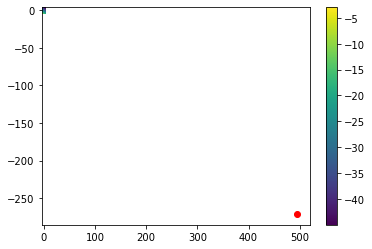

In [23]:
from scipy.optimize import differential_evolution
opt = differential_evolution(eggholder, bounds)
print("minimum",opt.fun,"found at",opt.x)
plot_results()

## Least-squares fitting

In [44]:
from scipy.optimize import curve_fit
def fit_func2(u,a,b,c):
    return a*np.sqrt(u) + b*np.exp(u)+c 

u = np.array([4.0, 2.0, 1.0, 5.0e-1, 2.5e-1, 1.67e-1, 1.25e-1, 1.0e-1, 8.33e-2, 7.14e-2, 6.25e-2])
y = np.array([1.957e-1, 1.947e-1, 1.735e-1, 1.6e-1, 8.44e-2, 6.27e-2,4.56e-2, 3.42e-2, 3.23e-2, 2.35e-2, 2.46e-2])
x0 = np.array([1,1,1])
res, cov, inf, msg, ler = curve_fit(fit_func2,u, y, full_output=True)
print("optimal set", res)
print(inf["nfev"], "evaluations")

optimal set [ 0.18111416 -0.00291265 -0.01016409]
9 evaluations


In [45]:
from scipy.optimize import least_squares
def fit_func1(x,u):
    #x are parameters
    #u are position for which we compute y
    return x[0]*np.sqrt(u) + x[1]*np.exp(u)+x[2] 
def differences(x,u,y):
    return fit_func(x,u)-y
x0 = np.array([1,1,1])
res = least_squares(differences, x0,args=(u, y), verbose=1)
print("optimal set",res.x)

`gtol` termination condition is satisfied.
Function evaluations 3, initial cost 1.7298e+03, final cost 1.8094e-03, first-order optimality 2.27e-11.


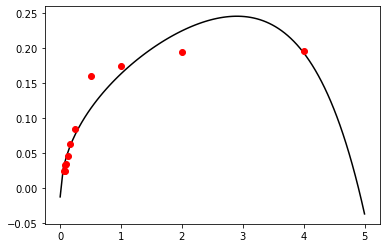

In [28]:
xx = np.linspace(0,5,100)
yy = fit_func(res.x,xx)
plt.plot(xx,yy,"-k")
plt.plot(u,y,"ro")
plt.show()